# BUSINESS CONTEXT & GOALS

[Click Here to Access The Dataset!](https://drive.google.com/drive/folders/1A_KBMRFTS5Mthpp46nulso679ML4ZwTF "Airbnb Listing Bangkok")

[Tableau Dashboard Click Here!](https://public.tableau.com/app/profile/lieftha.hasaz/viz/AirBnbBangkokListingsOverview/AirBnbBangkokListingsOverview?publish=yes "Airbnb Listing Bangkok Dashboard")


About Airbnb

Airbnb is a digital platform that functions as an online marketplace for short-term accommodation rentals. The platform facilitates property owners (hosts) in promoting and renting out their living spaces, while guests can search for and book various types of lodgings, ranging from entire properties and apartments to shared rooms. The entire process—from listing and searching to booking and payment—is conducted online. To enhance the platform's reliability and security, Airbnb also integrates a review and rating system from both parties.

Airbnb's business model relies on revenue from commissions earned from each successful booking transaction, which are charged to both hosts and guests. Therefore, host participation and satisfaction are crucial components for the company's revenue sustainability.


Challenges Faced

- Lack of clarity to understand the concentration of listings based on geographic distribution, making it difficult to identify market potential by region.

- Inability to identify and group hosts by operational scale hinders professional host development.

- Hosts struggle to set competitive prices due to a lack of comparative data and market analysis.

- Hosts also need to understand the distribution and availability of accommodation types to better understand market conditions and consumer needs.

- Hosts also need insight into total listing reviews over time. Few or no reviews may appear less credible, potentially deterring potential guests from booking.


Objectives

- Identify areas with fewer listings but high demand to balance property distribution and increase occupancy rates in underrepresented areas.

- Classify hosts into segments based on operational scale to enable more targeted support and feature offerings.

- Provide hosts with insight into pricing by room type and location to help them set competitive and attractive prices.

- Provide hosts with in-depth insights into consumer preferences, including the distribution of housing types, popular amenities, and availability levels for each segment, to help them optimize their offerings to meet market needs.

- Help hosts identify trend patterns based on total listing reviews over time.

In [1]:
%pip install --upgrade nbformat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from scipy.stats import normaltest, kruskal

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# DATA UNDERSTANDING

Let's start to access and explore the data

In [2]:
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


As you can see when we open the data, the `Unnamed:0` column isn't very meaningful to our data. 

So, we can simply choose to delete that column from our data.

In [3]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,NaN,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,NaN,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,NaN,3,365,0


## Data Type

Let's check whether each column in the data has a valid type and is suitable for our analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              15854 non-null  int64  
 1   name                            15846 non-null  object 
 2   host_id                         15854 non-null  int64  
 3   host_name                       15853 non-null  object 
 4   neighbourhood                   15854 non-null  object 
 5   latitude                        15854 non-null  float64
 6   longitude                       15854 non-null  float64
 7   room_type                       15854 non-null  object 
 8   price                           15854 non-null  int64  
 9   minimum_nights                  15854 non-null  int64  
 10  number_of_reviews               15854 non-null  int64  
 11  last_review                     10064 non-null  object 
 12  reviews_per_month               

From the results of our inspection, one column named `last_review` seems inappropriate because the column contains *datetime* data while the data type description is *object*.

##  Missing Values (NaN Values)

Let's check whether the data in each column has NaN values.

In [5]:
df.isna().sum()

id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

From the checking results, there are 4 data that have NaN values, including `name`, `host_name`, `last_review`, `review_per_month`.

Let's calculate the proportion of missing values ​​in each data.

In [6]:
# Missing Value Proportion

null = ['name','host_name','last_review','reviews_per_month']

for i in null:
    proportion = (len(df[df[i].isna()])/len(df)*100)
    print(f'Missing value proportion in variable "{i}" total {len(df)} data is = {round(proportion,4)}%')

Missing value proportion in variable "name" total 15854 data is = 0.0505%
Missing value proportion in variable "host_name" total 15854 data is = 0.0063%
Missing value proportion in variable "last_review" total 15854 data is = 36.5208%
Missing value proportion in variable "reviews_per_month" total 15854 data is = 36.5208%


## Data Formatting

## Number of Unique

This part will show total unique data in each column with all of the sample unique value in it


In [7]:
pd.set_option('display.max_colwidth', 120)
listItem = []
for col in df.columns:
    listItem.append([col, df[col].nunique(), df[col].unique()])
tabelDesc = pd.DataFrame(columns= ['Column Name', 'Total Unique', 'Unique Sample'],
                         data=listItem)
tabelDesc

,Column Name,Total Unique,Unique Sample
0,id,15854,"[27934, 27979, 28745, 35780, 941865, 1704776, 48736, 1738669, 1744248, 952677, 55681, 1765918, 55686, 59221, 959254,..."
1,name,14794,"[Nice room with superb city view, Easy going landlord,easy place, modern-style apartment in Bangkok, Spacious one be..."
2,host_id,6659,"[120437, 120541, 123784, 153730, 610315, 2129668, 222005, 7045870, 9181769, 5171292, 263049, 9279712, 284095, 515347..."
3,host_name,5312,"[Nuttee, Emy, Familyroom, Sirilak, Kasem, Wimonpak, Athitaya, Jiraporn, Nol, Somsak, Tor, Jing, Mimi, Natcha, Srisuk..."
4,neighbourhood,50,"[Ratchathewi, Bang Na, Bang Kapi, Din Daeng, Bang Kho laen, Rat Burana, Chatu Chak, Khlong San, Bang Rak, Phaya Thai..."
5,latitude,9606,"[13.75983, 13.66818, 13.75232, 13.78823, 13.76872, 13.69757, 13.68556, 13.82925, 13.81693, 13.7204, 13.71934, 13.774..."
6,longitude,10224,"[100.54134, 100.61674, 100.62402, 100.57256, 100.63338, 100.5288, 100.49535, 100.56737, 100.56433, 100.50757, 100.51..."
7,room_type,4,"[Entire home/apt, Private room, Hotel room, Shared room]"
8,price,3040,"[1905, 1316, 800, 1286, 1000, 1558, 1461, 700, 1150, 1893, 1862, 910, 1400, 4156, 1577, 122594, 5680, 5034, 1500, 13..."
9,minimum_nights,86,"[3, 1, 60, 7, 250, 2, 15, 30, 28, 21, 27, 4, 180, 90, 5, 358, 1125, 29, 14, 200, 365, 120, 9, 12, 300, 360, 100, 10,..."


## Checking Data Duplicate

This part is checking data values that contains duplicate

In [8]:
# Checking columns which doesn't have duplicate

for column in df.columns:
    duplicate_rows = df[df[column].duplicated()]
    if duplicate_rows.empty:
        print(f"Column '{column}' doesn't have duplicate value")


Column 'id' doesn't have duplicate value


## Descriptive Analysis

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,1.585400e+04,1.585400e+04,15854.000000,15854.000000,1.585400e+04,15854.000000,15854.000000,10064.000000,15854.000000,15854.000000,15854.000000
mean,1.579397e+17,1.541058e+08,13.745144,100.559903,3.217704e+03,15.292355,16.654157,0.813145,13.889618,244.378643,3.481519
std,2.946015e+17,1.318726e+08,0.043040,0.050911,2.497212e+04,50.815020,40.613331,1.090196,30.269848,125.843224,8.916937
min,2.793400e+04,5.892000e+04,13.527300,100.329550,0.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,2.104509e+07,3.974431e+07,13.720090,100.529690,9.000000e+02,1.000000,0.000000,0.120000,1.000000,138.000000,0.000000
50%,3.503734e+07,1.224556e+08,13.738490,100.561415,1.429000e+03,1.000000,2.000000,0.435000,4.000000,309.000000,0.000000
75%,5.256154e+07,2.390547e+08,13.759497,100.585150,2.429000e+03,7.000000,13.000000,1.060000,13.000000,360.000000,3.000000
max,7.908162e+17,4.926659e+08,13.953540,100.923440,1.100000e+06,1125.000000,1224.000000,19.130000,228.000000,365.000000,325.000000


In [10]:
df.describe(include='object')

,name,host_name,neighbourhood,room_type,last_review
count,15846,15853,15854,15854,10064
unique,14794,5312,50,4,1669
top,New! La Chada Night Market studio 2PPL near MRT,Curry,Vadhana,Entire home/apt,2022-12-11
freq,45,228,2153,8912,189


In [11]:
df_num = df[['price','minimum_nights','reviews_per_month','calculated_host_listings_count','availability_365','number_of_reviews','number_of_reviews_ltm']]

## Checking Outlier

In [12]:
# Boxplot visualisation for each column
import plotly.express as px

colors = px.colors.qualitative.Plotly
fig = None
for column, color in zip(df_num.columns, colors):
    fig = px.box(df_num, y=column, color_discrete_sequence=[color], 
                 title=f'Boxplot of {column}')
    fig.show()

# Table for outliers results in each column
# Iterasi untuk setiap kolom numerik
outlier_info =[]
for col in df_num.columns:
    q1 = df_num[col].quantile(0.25)
    median = df_num[col].median()
    q3 = df_num[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = df_num[col].min()
    upper_bound = q3 +(1.5*IQR)
    outliers = df_num[(df_num[col] < lower_bound )| (df_num[col] > upper_bound)]
    num_outliers = len(outliers)
    outlier_info.append([col, lower_bound, q1,median,q3, upper_bound,IQR, num_outliers])

outlier_df = pd.DataFrame(outlier_info, columns = ['Column Name', 'Lower Bound', 'Q1', 'Median', 'Q3', 'Upper Bound', 'IQR', 'Total Outliers'])
outlier_df.sort_values('Total Outliers', ascending = False).reset_index(drop=True)

,Column Name,Lower Bound,Q1,Median,Q3,Upper Bound,IQR,Total Outliers
0,minimum_nights,1.00,1.00,1.000,7.00,16.00,6.00,3168
1,number_of_reviews,0.00,0.00,2.000,13.00,32.50,13.00,2240
2,number_of_reviews_ltm,0.00,0.00,0.000,3.00,7.50,3.00,2219
3,calculated_host_listings_count,1.00,1.00,4.000,13.00,31.00,12.00,1832
4,price,0.00,900.00,1429.000,2429.00,4722.50,1529.00,1403
5,reviews_per_month,0.01,0.12,0.435,1.06,2.47,0.94,693
6,availability_365,0.00,138.00,309.000,360.00,693.00,222.00,0


## Data Distribution

Next, we'll conduct a data testing to identify if our data is normally distributed or not

In [13]:
normality_results= []
for col in df_num.columns:
    stat, p = normaltest(df_num[col])
    normal = "Normally Distributed" if p >0.05 else "Not Normally Distributed"
    normality_results.append([col, stat, p, normal])

normality_df = pd.DataFrame(normality_results, columns=['Column', 'Statistic Test', 'p-value','Asumption'])
normality_df

,Column,Statistic Test,p-value,Asumption
0,price,43049.944446,0.0,Not Normally Distributed
1,minimum_nights,22191.920998,0.0,Not Normally Distributed
2,reviews_per_month,NaN,NaN,Not Normally Distributed
3,calculated_host_listings_count,16475.886965,0.0,Not Normally Distributed
4,availability_365,12899.894275,0.0,Not Normally Distributed
5,number_of_reviews,19164.706395,0.0,Not Normally Distributed
6,number_of_reviews_ltm,24897.587195,0.0,Not Normally Distributed


### Correlation - Association

To better understand the characteristics of our data, let's perform a correlation test between the variables in the data. 

Because our data is not normally distributed, we will use the Spearman correlation test dan use heatmap to visualize the test.

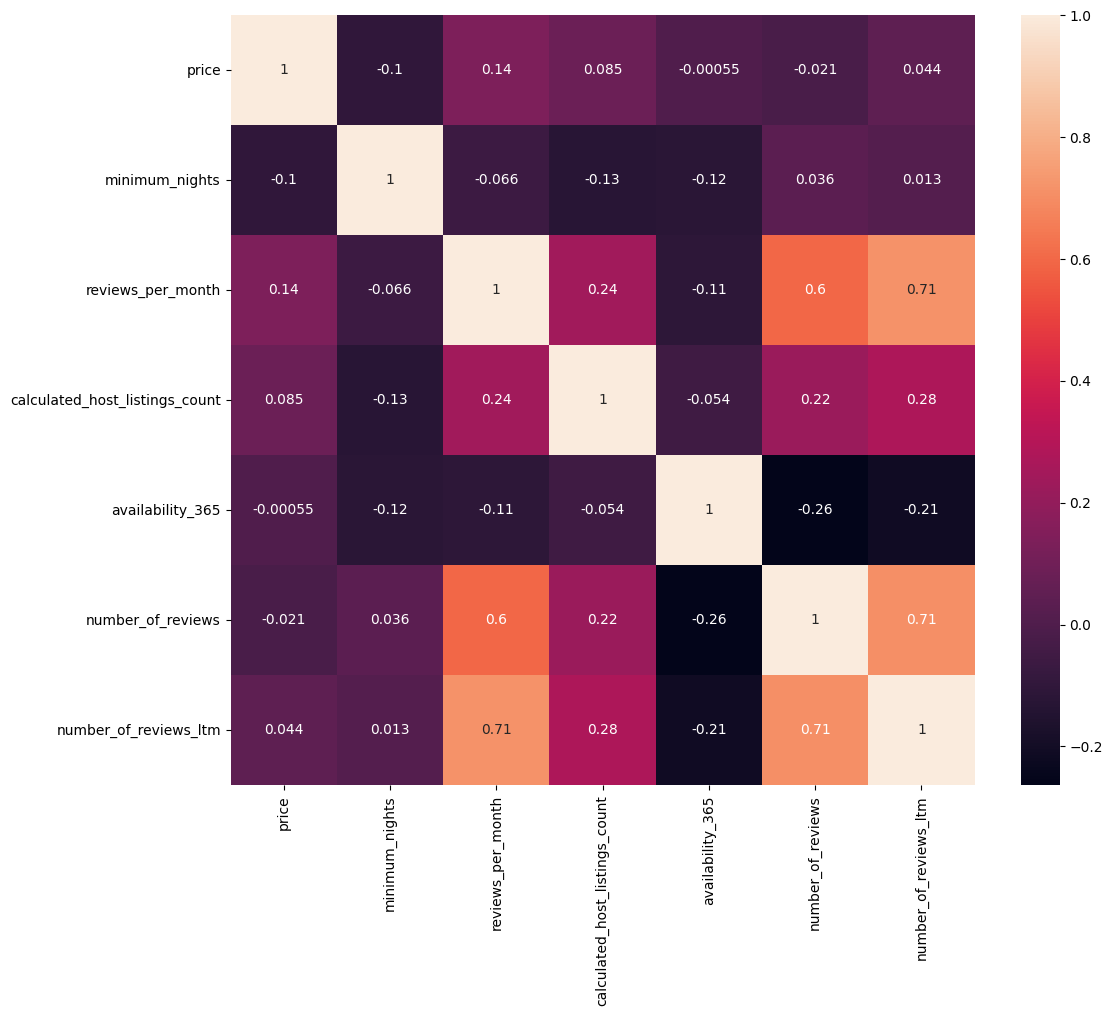

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df_num.corr(method='spearman'), annot=True)
plt.show()

Spearman Correlation Matrix Interpretation
- Very Strong Correlation

    `reviews_per_month` vs `number_of_reviews_ltm`: 0.71

    Interpretation: Very strong positive correlation

    This means: The more reviews in the last 12 months, the higher the average reviews per month.

    Implication: These two variables measure similar concepts related to review activity.

- Weak to Moderate Correlation

    `reviews_per_month` vs `calculated_host_listings_count`: 0.24

    Interpretation: Weak positive correlation

    This means: Hosts with more listings tend to have slightly more reviews per month.

    `number_of_reviews_ltm` vs `calculated_host_listings_count`: 0.28

    Interpretation: Weak positive correlation

    This means: Hosts with more listings tend to have more reviews in the last 12 months.

- Negative Correlation Weak

    `number_of_reviews_ltm` vs `availability_365`: -0.21

    Interpretation: Weak negative correlation

    This means that properties with higher availability tend to have fewer reviews in the last 12 months.

    `minimum_nights` vs `calculated_host_listings_count`: -0.13

    Interpretation: Very weak negative correlation

    This means that hosts with more listings tend to set slightly lower minimum nights.

    `minimum_nights` vs `availability_365`: -0.12

    Interpretation: Very weak negative correlation

    This means that properties with higher minimum nights tend to be slightly less available.

- Insignificant Correlation (close to 0)

    `price` vs almost all other variables:

    `price` vs `availability_365`: -0.00055 (no correlation at all) (Once)

    `price` vs `minimum_nights`: -0.1 (very weak)

    `price` vs `number_of_reviews_ltm`: 0.044 (very weak)

# DATA PREPARATION & CLEANSING

In this part we'll conduct data manipulation and cleansing to help us enhance quality and clarity of our data

## Fixing Data Type


In previous analyze, we figured it out that `last_review`  column has to be `datetime` not `object`. So first we'll going to change `last_review` column data type into `datetime`

In [15]:
df['last_review'] = pd.to_datetime(df['last_review'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              15854 non-null  int64         
 1   name                            15846 non-null  object        
 2   host_id                         15854 non-null  int64         
 3   host_name                       15853 non-null  object        
 4   neighbourhood                   15854 non-null  object        
 5   latitude                        15854 non-null  float64       
 6   longitude                       15854 non-null  float64       
 7   room_type                       15854 non-null  object        
 8   price                           15854 non-null  int64         
 9   minimum_nights                  15854 non-null  int64         
 10  number_of_reviews               15854 non-null  int64         
 11  la

## Handling missing values by removing and doing filling method

Removing "Missing Value" in column `name` and `host_name`.

Because `name` and `host_name` are valid information that can not be filling with any values

In [17]:
df.dropna(subset=['name'], inplace=True)

In [18]:
df.dropna(subset=['host_name'], inplace=True)

Removing "0" value in `price` column.

Because the information is not valid.

In [19]:
df.drop(df[df['price'] == 0].index, inplace=True)

Fiiling "Missing Value" ini `review_per_month` column.

Because no reviews mean 0 reviews is valid.

In [20]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

Let's preview our data after perform data menipulation & cleansing.

In [21]:
df.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaT,0.00,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaT,0.00,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaT,0.00,3,365,0


In [22]:
df.to_csv('Airbnb_listing_bangkok.csv', index=False)


# EXPLORATORY DATA ANALYSIS

## Total Count Analysis

- How many total listings are there on Airbnb Bangkok?

- How many total host are there on Airbnb Bangkok?

- How many total neighbourhood are there on Airbnb Bangkok?

In [23]:
total_listings = len(df)
total_unique_hosts = df['host_id'].nunique()
total_neighbourhoods = df['neighbourhood'].nunique()

print(f'The total listing of Airbnb Bangkok is {total_listings}')
print(f'The total host of Airbnb Bangkok is {total_unique_hosts}')
print(f'The total neighbourhood of Airbnb Bangkok is {total_neighbourhoods}')

The total listing of Airbnb Bangkok is 15844
The total host of Airbnb Bangkok is 6650
The total neighbourhood of Airbnb Bangkok is 50


## Neighbourhood Analysis



### - Do all districts in Bangkok (Thailand) have Airbnb?

In [24]:
total_neighbourhoods

50

Yes, according to official information from Thailand, Bangkok has 50 districts, meaning Airbnb is available in all districts in Bangkok.

### - Which districts are in the Top 10 with the most listings?

In [25]:
df.groupby('neighbourhood').count()['id']

neighbourhood
Bang Bon                   5
Bang Kapi                259
Bang Khae                 92
Bang Khen                116
Bang Kho laen            140
Bang Khun thain           21
Bang Na                  457
Bang Phlat               216
Bang Rak                 827
Bang Sue                 250
Bangkok Noi              152
Bangkok Yai               90
Bueng Kum                 54
Chatu Chak               548
Chom Thong                74
Din Daeng                443
Don Mueang               167
Dusit                     91
Huai Khwang             1125
Khan Na Yao               55
Khlong Sam Wa             32
Khlong San               357
Khlong Toei             2096
Lak Si                   126
Lat Krabang              149
Lat Phrao                 57
Min Buri                  62
Nong Chok                 14
Nong Khaem                 9
Parthum Wan              455
Phasi Charoen            155
Phaya Thai               422
Phra Khanong             557
Phra Nakhon              619


In [26]:
top_10_neighbourhood = (df.groupby('neighbourhood')
                        .count()['id']
                        .sort_values(ascending=False)
                        .head(10)
                        .reset_index())

fig = px.bar(top_10_neighbourhood,
             x = 'neighbourhood',
             y = 'id',
             title = 'Top 10 Neighbourhood by Number of Listing',
             labels = {'neighbourhood': 'Neighbourhood (District)', 'id': 'Number of Listing'},
             text = 'id')

fig.update_traces(textposition= 'outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode= 'hide')

fig.show()

This is the Top 10 districts in Bangkok with the highest total listings. 

The bar chart clearly shows that Vardhana District has the most Airbnb listings compared to other districts, this is because Vardhana is located in central Bangkok.

In [27]:
top_10_neighbourhood = (df.groupby('neighbourhood')
                        .count()['id']
                        .sort_values(ascending=False)
                        .tail(10)
                        .reset_index())

fig = px.bar(top_10_neighbourhood,
             x = 'neighbourhood',
             y = 'id',
             title = 'Top 10 Lowest Neighbourhood by Number of Listing',
             labels = {'neighbourhood': 'Neighbourhood (District)', 'id': 'Number of Listing'},
             text = 'id',
             color_discrete_sequence=['red'])  # Menambahkan parameter ini untuk mengubah warna

fig.update_traces(textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.show()

### * Insight from Neighbourhood Analysis


Central Business Districts
- Vadhana, Khlong Toei, and other areas in downtown Bangkok have the highest number of listings.

Patterns Based on Area Characteristics
- The residential suburbs of Bang Bon,  Nong Khaem etc tend to have fewer listings. The relatively unequal comparison of total listings compared to the downtown area makes these areas a potential area for expansion, but further analysis is needed.

## Host Analysis

### - Create a host category segmentation based on total listings.

In [28]:

host_listing_stats = df.groupby('host_id').agg({
    'id': 'count',
    'host_name': 'first',
    'neighbourhood': 'first'
}).rename(columns={'id': 'listing_count'}).reset_index()

host_categories = {
    'Single Listing (1)': (host_listing_stats['listing_count'] == 1).sum(),
    'Small Host (2-5)': ((host_listing_stats['listing_count'] >= 2) & 
                        (host_listing_stats['listing_count'] <= 5)).sum(),
    'Medium Host (6-20)': ((host_listing_stats['listing_count'] >= 6) & 
                          (host_listing_stats['listing_count'] <= 20)).sum(),
    'Large Host (21-50)': ((host_listing_stats['listing_count'] >= 21) & 
                          (host_listing_stats['listing_count'] <= 50)).sum(),
    'Super Host (>50)': (host_listing_stats['listing_count'] > 50).sum()
}

print("HOST CATEGORIZATION BY LISTING COUNT")
print("-" * 40)
for category, count in host_categories.items():
    percentage = (count / total_unique_hosts) * 100
    print(f"{category:20}: {count:>4} hosts ({percentage:5.1f}%)")


print("PIE CHART - HOST CATEGORY BY TOTAL LISTING")


import plotly.graph_objects as go
from plotly.subplots import make_subplots

categories = list(host_categories.keys())
counts = list(host_categories.values())
percentages = [(count / total_unique_hosts) * 100 for count in counts]

colors = ['#FF6B6B', "#6C4ECD", '#45B7D1', '#96CEB4', '#FFEAA7']

fig_pie_basic = go.Figure(data=[go.Pie(
    labels=categories,
    values=counts,
    hole=0.4,
    marker_colors=colors,
    textinfo='label+percent',
    hovertemplate='<b>%{label}</b><br>' +
                  'Total Host: %{value}<br>' +
                  'Persentation: %{percent}<br>' +
                  '<extra></extra>'
)])

fig_pie_basic.update_layout(
    title_text="Host Category Distribution by Total Listing",
    title_x=0.5,
    height=500,
    showlegend=True,
    annotations=[dict(text=f'Total Hosts<br>{total_unique_hosts:,}', x=0.5, y=0.5, font_size=14, showarrow=False)]
)

fig_pie_basic.show()


HOST CATEGORIZATION BY LISTING COUNT


----------------------------------------
Single Listing (1)  : 4597 hosts ( 69.1%)
Small Host (2-5)    : 1546 hosts ( 23.2%)
Medium Host (6-20)  :  421 hosts (  6.3%)
Large Host (21-50)  :   79 hosts (  1.2%)
Super Host (>50)    :    7 hosts (  0.1%)
PIE CHART - HOST CATEGORY BY TOTAL LISTING


### Top 10 host by total review

In [29]:

host_review_stats = df.groupby(['host_name']).agg({
    'number_of_reviews': 'sum'
}).rename(columns={
    'number_of_reviews': 'total_reviews',
}).reset_index()

host_review_stats
top_10_hosts_by_reviews = host_review_stats.nlargest(10, 'total_reviews')

fig = px.bar(top_10_hosts_by_reviews,
             x = 'host_name',
             y = 'total_reviews',
             title = 'Top 10 Host by Total Review',
             labels = {'host_name': 'The Host', 'total_reviews': 'Total Review'},
             text = 'total_reviews')

fig.update_traces(textposition= 'outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode= 'hide')

### * Insight from Host Analysis

The Market Is Dominated by Individual/Small Hosts

- 69.1% of hosts have only 1 listing → indicating the still traditional/individual nature of the market

- Only 0.105% are "Super Hosts" with >50 listings → professional property management is still rare

Healthy Pyramid Structure

- Distribution follows a normal pyramid pattern: the more listings, the fewer hosts have them

- ​​Small Hosts (2-5 listings) represent 23.2% → there are quite a few hosts starting to grow

Professional Host Growth Potential

- Medium and Large Hosts only account for 7.5% of the total → a huge opportunity to develop professional hosts

High Correlation between Number of Reviews and Success

- Top hosts like Evan (>5,000 reviews), Tony, and Curry show very strong performance

- High reviews indicate consistent booking volume and guest satisfaction

Consistent Performance of Top Hosts

- The top 10 hosts have reviews between 2,500-5,000 → shows consistency in service quality

## Price Analysis



### - Top 10 highest and lowest priced residences

In [30]:
df.sort_values(by='price', ascending= False).head(10)[['name','neighbourhood','price']]

,name,neighbourhood,price
12868,New 1 bedroom apartment BTS MRT Asoke,Vadhana,1100000
12300,3B中文No Guest Service Fee@Nana Asok/Soi11 Nightlife,Vadhana,1014758
4620,"Modern&Luxury apartment,5min to MRT,freeWifi",Huai Khwang,1000000
6289,BTS轻轨线on nut站，全新一房一厅，临Tesco商场市集!New cozy 1BR,Khlong Toei,1000000
1779,"2 Bedroom,wifi,5mMRT&Shopping Mall",Huai Khwang,1000000
9345,1BR cozy condo close to ONNUT BTS.,Khlong Toei,1000000
1239,"Modern,wifi,5m MRT&2 Shopping Mall",Huai Khwang,1000000
15200,80米轻轨站，空中泳池+健身房，I con siam沙吞河景圈，距离大皇宫4公里，乳胶床垫,Khlong San,710760
4373,rm 1 : cozy & comfy,Bang Phlat,600700
11885,🎗𝘾𝙝𝙚𝙬𝙖𝙩𝙝𝙖𝙞 𝙍𝙖𝙢𝙠𝙝𝙖𝙢𝙝𝙖𝙚𝙣𝙜\nBy KhunGrape,Bang Kapi,429443


In [31]:
df.sort_values(by='price', ascending= False).tail(10)[['name','neighbourhood','price']]

,name,neighbourhood,price
9699,Mystery Hostel,Phra Nakhon,304
8974,🏡5 mins walk to 🚅 Cozy room in a local living😊,Phasi Charoen,304
9558,Standard Room 10 Bed With Shared Bathroom,Phra Nakhon,304
9636,Mystery Hostel l: Deluxe 10 Bred Mix Dormitory,Phra Nakhon,303
9529,Private fan room with local family,Bangkok Noi,300
15473,Flourish Capsule Hostel,Bang Rak,295
15401,Mixed Dorm 10 Bunkbed at Amazing khaosan Hostel 2,Phra Nakhon,280
15455,1 Upper-Bunk Bed /w Shared Bath,Suanluang,280
15456,1 Lower-Bunk Bed /w Shared Bath,Suanluang,280
15551,Artist Private AirRoom 10min2SkytrainPetFriendly,Phasi Charoen,278


It was found that there were 7 residences with the highest price >= 1,000,000 Baht, and these 7 residences were spread across 3 districts: Vadhana, Huang Khwang, and Khlong Toei. These districts are located in the center of Bangkok.

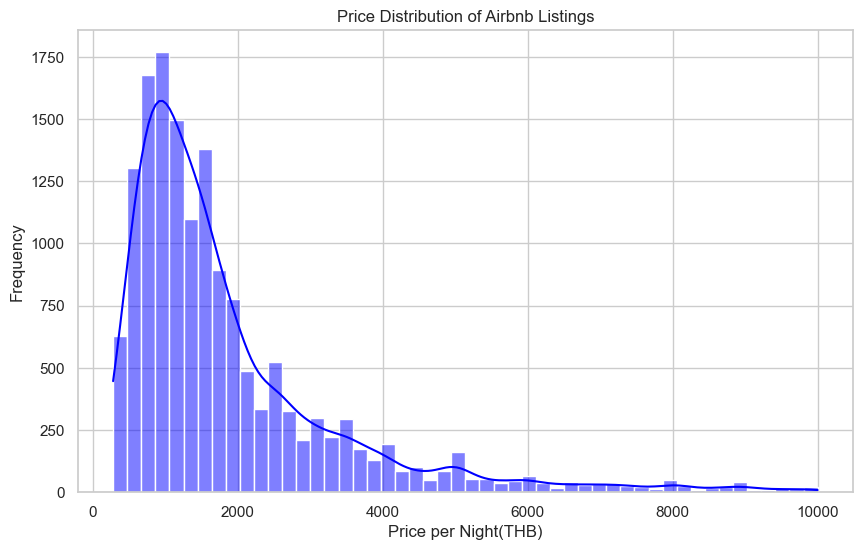

In [46]:
sns. set(style='whitegrid')

# Price Distribution
plt.figure(figsize=(10,6))
sns.histplot(df[df['price'] < 10000], x = 'price', bins = 50, kde=True, color='blue')
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price per Night(THB)')
plt.ylabel('Frequency')
plt.show()

### - How is the average distribution price for each Neighbourhood (district)?

In [45]:
neighbourhood_median_prices = df.groupby('neighbourhood')['price'].median().reset_index().sort_values(by= 'price', ascending=False)

# horizontal bar chart
fig_hbar = go.Figure()

fig_hbar.add_trace(go.Bar(
    y=neighbourhood_median_prices['neighbourhood'],
    x=neighbourhood_median_prices['price'],
    orientation='h',
    marker=dict(
        color=neighbourhood_median_prices['price'],
        colorscale='viridis',
        showscale=True,
        colorbar=dict(title="Median Price (THB)")
    ),
    hovertemplate=(
        '<b>%{y}</b><br>' +
        'Median Price: THB %{x:,.0f}<br>' +
        '<extra></extra>'
    ),
    text=neighbourhood_median_prices['price'].round(0),
    texttemplate='THB %{text:,.0f}',
    textposition='auto'
))

fig_hbar.update_layout(
    title_text="Average Price per Neighbourhood (Highest to Lowest)",
    title_x=0.5,
    xaxis_title="Median Price (THB)",
    yaxis_title="Neighbourhood",
    height=600,
    showlegend=False,
    yaxis=dict(autorange='reversed')  
)

# Tambahkan informasi tambahan
fig_hbar.add_annotation(
    text=f"Data by {len(neighbourhood_median_prices)} neighbourhood ",
    xref="paper", yref="paper",
    x=0.5, y=-0.15,
    showarrow=False,
    font=dict(size=10, color="gray")
)

fig_hbar.show()

Because the data is not normally distributed, the median is used as a measure of Central Tendency.

The graph shows that the district with the highest median price is Nong Chok.

### - Are prices the same for each type of room type? (Do Hyphotesis Test)

In [33]:
print("HYPOTHESIS TESTING USING THE KRUSKAL WALLIS METHOD BECAUSE THE DATA IS NOT NORMALLY DISTRIBUTED")
print("\nFORMULASI HIPOTESIS")
print("-" * 30)
print("H₀ : (Null Hypothesis): The median price of Airbnb accommodations for all types is the same.")
print("H₁ : (Alternative Hypothesis): There is at least one pair of housing types whose median prices are not the same.")
print("α (Level of Significance): 0.05")

entire_room = df[df['room_type'] == 'Entire home/apt']['price']
private_room = df[df['room_type'] == 'Private room']['price']
hotel_room = df[df['room_type'] == 'Hotel room']['price']
shared_room = df[df['room_type'] == 'Shared room']['price']

statistic, p_value = kruskal(entire_room,private_room, hotel_room, shared_room)
alpha = 0.05
print(f'Statistic Value Kruskal-Wallis:{statistic}')
print(f'P-value: {p_value}')

# Keputusan Statistik
print("\nSTATISTICAL DECISION")
print("-" * 25)

alpha = 0.05
if p_value < alpha:
    print("✅ REJECT H₀ (Null Hypothesis)")
    print("   - There is sufficient statistical evidence to reject the null hypothesis.")
    print("   - P-value < alpha ({} < {})".format(f"{p_value:.4f}", alpha))
else:
    print("✅ FAILED REJECT H₀ (Null Hypothesis)")
    print("   - There is no sufficient statistical evidence to reject the null hypothesis.")
    print("   - P-value ≥ alpha ({} ≥ {})".format(f"{p_value:.4f}", alpha))


print("\nINTERPRETATION OF RESULTS")
print("-" * 25)

if p_value < alpha:
    print("Based on the results of the Kruskal-Wallis test:")
    print("• There is a statistically significant difference in the median price")
    print("  at least between one pair of Airbnb room_types in Bangkok.")
    
else:
    print("Based on the results of the Kruskal-Wallis test:")
    print("• There was no statistically significant difference in")
    print("  median price across different Airbnb room types in Bangkok.")
    


HYPOTHESIS TESTING USING THE KRUSKAL WALLIS METHOD BECAUSE THE DATA IS NOT NORMALLY DISTRIBUTED

FORMULASI HIPOTESIS
------------------------------
H₀ : (Null Hypothesis): The median price of Airbnb accommodations for all types is the same.
H₁ : (Alternative Hypothesis): There is at least one pair of housing types whose median prices are not the same.
α (Level of Significance): 0.05
Statistic Value Kruskal-Wallis:1189.0008553107386
P-value: 1.7850102960418103e-257

STATISTICAL DECISION
-------------------------
✅ REJECT H₀ (Null Hypothesis)
   - There is sufficient statistical evidence to reject the null hypothesis.
   - P-value < alpha (0.0000 < 0.05)

INTERPRETATION OF RESULTS
-------------------------
Based on the results of the Kruskal-Wallis test:
• There is a statistically significant difference in the median price
  at least between one pair of Airbnb room_types in Bangkok.


### * Insight from Price Analysis

High-Volume Market vs. Exclusive Market

- The fact that Vardhana has the highest total price, directly proportional to its total listings, indicates that the city is a major hub of business activity, generating a very high volume of accommodation transactions.

- The fact that Nong Chok is the most expensive market in terms of average price, not directly proportional to its total listings, indicates that the Nong Chok market is driven by high unit values ​​rather than a large number of accommodations.

Extreme Price Variation Between Regions

- Nong Chok: highest price (2,539 THB) - 3x more expensive than the low-end segment

- Wang Thong Lang: lowest price (~800 THB)

- Significant differences reflect variations in attractiveness and amenities

Price Concentration in the Mid-Low Range

- The majority of listings (highest frequency) are priced between 0-2,000 THB per night

- Price distribution is right-skewed, indicating few premium listings

- The distribution peak of around 1,000-1,500 THB indicates the middle segment as mainstream.

- Prices in the 2,000-4,000 THB range and above are very rare, representing the premium and luxury segments. There is good potential for development into the "premium affordable" and "luxury" segments.

## Room Type Analysis


### - What type of room is most commonly available?


In [35]:
df.groupby('room_type').count()['id'].reset_index()

,room_type,id
0,Entire home/apt,8911
1,Hotel room,648
2,Private room,5762
3,Shared room,523


In [36]:
room_type_counts = df['room_type'].value_counts().reset_index()
room_type_counts_columns = ['room_type','count']

labels = room_type_counts['room_type']
values = room_type_counts['count']

fig = go.Figure(data=[go.Pie(labels=labels, values = values, hole= .3, pull = [0.1,0,0,0])])
fig.update_layout(
    title_text='Distribution of Room Types',
    annotations = [dict(text=f'{len(df)}', x=0.5, y=0.5, font_size=20, showarrow= False)]
)

fig.show()

From the pie chart results, it was found that the Entire home/apt type of residence has a larger proportion compared to other types of residence.

In [37]:
df.groupby(df['last_review'].dt.year)['number_of_reviews'].sum().reset_index()

,last_review,number_of_reviews
0,2012.0,4
1,2013.0,30
2,2014.0,16
3,2015.0,182
4,2016.0,852
5,2017.0,1398
6,2018.0,3978
7,2019.0,10616
8,2020.0,31423
9,2021.0,4199


### - How is the distribution of room types across neighborhoods?


In [38]:
tipe_distrik = pd.crosstab(df['neighbourhood'], df['room_type'])
tipe_distrik['Total'] = tipe_distrik.sum(axis=1)
tipe_distrik.sort_values('Total', ascending=False)

room_type,Entire home/apt,Hotel room,Private room,Shared room,Total
neighbourhood,,,,,
Vadhana,1451,104,542,53,2150
Khlong Toei,1520,73,488,15,2096
Huai Khwang,776,25,301,23,1125
Ratchathewi,656,70,326,61,1113
Bang Rak,351,67,375,34,827
Sathon,557,15,220,17,809
Phra Nakhon,56,77,355,131,619
Phra Khanong,336,9,200,12,557
Chatu Chak,273,2,266,7,548


Dari distribusi di atas ditemukan bahwa  pada masing-masing distrik memiliki room_type dengan entire home/apt kebanyakan

### - Which type of room has the highest prices per night?

In [39]:
fig = px.bar(df.groupby('room_type')['price'].median().reset_index(), x='room_type', y='price', color='room_type',
             labels={'room_type':'Room Type', 'price':'Median Price'},
             title = 'Median Price of Listing by Room Type')
fig.show()

Based on the analysis carried out, it can be seen from the graph that the `room_type` with the highest median price is the Hotel room (1700) and the lowest is the Shared room (500)

### - Distribution of room_type availability in the next 365 days 

In [40]:
fig = px.bar(df.groupby('room_type')['availability_365'].median().reset_index(), x='room_type', y='availability_365', color='room_type',
             labels={'room_type':'Room Type', 'availability_365':'Average Availability (365 days)'},
             title = 'Average Availability of Listings by Room Type')
fig.show()

All room types have the highest availability with >250 days

### * Insight from Room Type Analysis

Entire Home/Apt Dominates the Market (56.2%)

- Demonstrates a strong traveler preference for fully furnished and private accommodations

- Reflects the post-pandemic trend of "workation" and family travel

- Median price >1,500 THB - premium positioning

- Better profit margins for hosts

- Vadhana & Khlong Toei: Entire Home/Apt Dominates, with 1,451 and 1,520 entire homes/apts, respectively, and could be target areas for premium offerings

- Entire home/apt availability is highest with >250 days, indicating potential oversupply or underutilization but potentially an opportunity for occupancy rate optimization


Private Rooms Remain Significant (36.4%)

- Popular choice for budget-conscious travelers

- Potential for solo travelers and backpackers

- Median price ~1,200 THB - value proposition

- Target market for budget travelers

- Phra Nakhon: Private Room Listings Highest: 355

- Suitable for budget accommodation near attractions


Hotel Rooms & Shared Rooms Minority (7.4%)

- Hotel rooms (4.09%) and shared rooms (3.3%) have a small share, indicates a specific niche market

- Median hotel price: ~1,700 THB - the price is not competitive , and shared rooms priced at ~500 THB 

- Target market: High budget travelers for hotel rooms and low budget travelers for shared room

- Phra Nakhon: Shared Rooms Highest: 131 shared rooms

- Suitable for budget accommodation near attractions

Average Availability Distribution
- All accommodation types have the highest availability with >250 days, indicating potential oversupply or underutilization but potentially an opportunity to optimize occupancy rates

## Review Analysis


### - Total reviews by year

In [41]:
df.groupby(df['last_review'].dt.year)['number_of_reviews'].sum().reset_index()

,last_review,number_of_reviews
0,2012.0,4
1,2013.0,30
2,2014.0,16
3,2015.0,182
4,2016.0,852
5,2017.0,1398
6,2018.0,3978
7,2019.0,10616
8,2020.0,31423
9,2021.0,4199


In [42]:
print("TOTAL REVIEWS BY YEAR")


df['last_review'] = pd.to_datetime(df['last_review'])
df['review_year'] = df['last_review'].dt.year


df_reviews = df[df['last_review'].notna()].copy()


reviews_by_year = df_reviews.groupby('review_year').agg({
    'id': 'count',  
    'number_of_reviews': 'sum'  
}).rename(columns={
    'id': 'review_count',
    'number_of_reviews': 'total_reviews_accumulated'
}).reset_index()


reviews_by_year['growth_rate'] = reviews_by_year['review_count'].pct_change() * 100
reviews_by_year['growth_rate'] = reviews_by_year['growth_rate'].fillna(0)

print("📊 TOTAL REVIEWS PER YEAR:")

for idx, row in reviews_by_year.iterrows():
    growth_symbol = "↑" if row['growth_rate'] > 0 else "↓" if row['growth_rate'] < 0 else "→"
    print(f" {int(row['review_year'])}: {row['total_reviews_accumulated']:>4} reviews "
          f"({row['growth_rate']:>+6.1f}% {growth_symbol})")

# Line Chart
fig = px.line(
    reviews_by_year,
    x='review_year',
    y='total_reviews_accumulated',
    title='<b>Trend Total Reviews Airbnb Bangkok per Year</b>',
    labels={'review_year': 'Year', 'review_count': 'Total Reviews'},
    markers=True,
    text='review_count'
)

# Customize the line chart
fig.update_traces(
    line=dict(width=4, color='#FF6B6B'),
    marker=dict(size=8, color='#FF6B6B'),
    textposition='top center',
    hovertemplate='<b>Tahun %{x}</b><br>Reviews: %{y}<br>Growth: %{customdata:.1f}%<extra></extra>',
    customdata=reviews_by_year['growth_rate']
)

# Update layout
fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12),
    height=500,
    showlegend=False,
    xaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        tickmode='linear'
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray',
        title='Total Reviews'
    )
)

# Add annotations for each data point
for idx, row in reviews_by_year.iterrows():
    fig.add_annotation(
        x=row['review_year'],
        y=row['total_reviews_accumulated'],
        text=f"{row['total_reviews_accumulated']}",
        showarrow=True,
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor='#FF6B6B',
        ax=0,
        ay=-30
    )

fig.show()


total_reviews = reviews_by_year['review_count'].sum()
avg_annual_growth = reviews_by_year['growth_rate'].mean()
peak_year = reviews_by_year.loc[reviews_by_year['total_reviews_accumulated'].idxmax()]

print(f"📈 Total Reviews: {total_reviews:,}")
print(f"📅 Year Range : {int(reviews_by_year['review_year'].min())} - {int(reviews_by_year['review_year'].max())}")
print(f"🚀 Peak Year: {int(peak_year['review_year'])} ({peak_year['total_reviews_accumulated']} reviews)")
print(f"📊 Average Annual Review Growth: {avg_annual_growth:+.1f}%")


TOTAL REVIEWS BY YEAR
📊 TOTAL REVIEWS PER YEAR:
 2012:  4.0 reviews (  +0.0% →)
 2013: 30.0 reviews (+600.0% ↑)
 2014: 16.0 reviews ( +28.6% ↑)
 2015: 182.0 reviews (+455.6% ↑)
 2016: 852.0 reviews (+198.0% ↑)
 2017: 1398.0 reviews ( +78.5% ↑)
 2018: 3978.0 reviews ( +82.0% ↑)
 2019: 10616.0 reviews (+109.1% ↑)
 2020: 31423.0 reviews ( +23.3% ↑)
 2021: 4199.0 reviews ( -83.4% ↓)
 2022: 211328.0 reviews (+3101.9% ↑)


📈 Total Reviews: 10,061
📅 Year Range : 2012 - 2022
🚀 Peak Year: 2022 (211328.0 reviews)
📊 Average Annual Review Growth: +417.6%


### - How is the review distribution by room_type in the last 12 month?

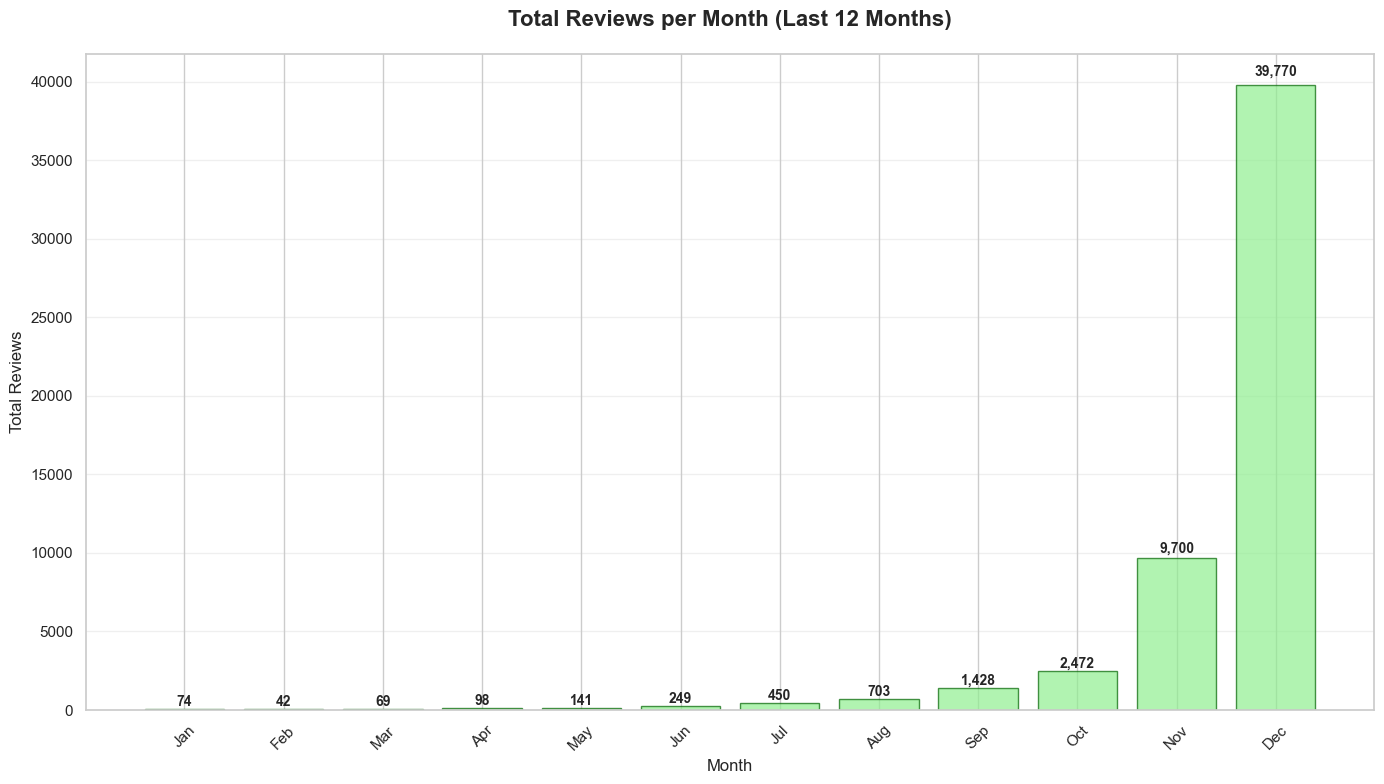

Monthly Total Reviews Data (Last 12 Months):
         Jan           74
         Feb           42
         Mar           69
         Apr           98
         May          141
         Jun          249
         Jul          450
         Aug          703
         Sep        1,428
         Oct        2,472
         Nov        9,700
         Dec       39,770


Total Months Analyzed: 12
Total All Reviews: 55,196
Average Monthly Reviews: 4,600
Highest Month: Dec (39,770 reviews)
Lowest Month: Feb (42 reviews)

Monthly Contribution (%):
         Jan      0.1%
         Feb      0.1%
         Mar      0.1%
         Apr      0.2%
         May      0.3%
         Jun      0.5%
         Jul      0.8%
         Aug      1.3%
         Sep      2.6%
         Oct      4.5%
         Nov     17.6%
         Dec     72.1%


In [43]:

latest_date = df['last_review'].max()
cutoff_date = latest_date - pd.DateOffset(months=12)
recent_reviews = df[df['last_review'] >= cutoff_date].copy()

recent_reviews['review_month'] = recent_reviews['last_review'].dt.month
recent_reviews['review_year'] = recent_reviews['last_review'].dt.year
recent_reviews['month_year'] = recent_reviews['last_review'].dt.strftime('%Y-%m')

month_names = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
recent_reviews['month_name'] = recent_reviews['review_month'].map(month_names)


monthly_sum = recent_reviews.groupby(['review_month', 'month_name']).agg({
    'number_of_reviews_ltm': 'sum'  
}).rename(columns={
    'number_of_reviews_ltm': 'total_reviews_ltm'
}).reset_index()


monthly_sum = monthly_sum.sort_values('review_month')

# Create visualization
fig, ax = plt.subplots(figsize=(14, 8))

bars = ax.bar(monthly_sum['month_name'], monthly_sum['total_reviews_ltm'], 
              color='lightgreen', edgecolor='darkgreen', alpha=0.7)

# Customization
ax.set_title('Total Reviews per Month (Last 12 Months)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Month', fontsize=12)
ax.set_ylabel('Total Reviews', fontsize=12)

# Add value labels 
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + (height * 0.01),
            f'{height:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Rotate x labels
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


print("Monthly Total Reviews Data (Last 12 Months):")
for _, row in monthly_sum.iterrows():
    print(f"{row['month_name']:>12} {row['total_reviews_ltm']:>12,.0f}")


print("\n")
print(f"Total Months Analyzed: {len(monthly_sum)}")
print(f"Total All Reviews: {monthly_sum['total_reviews_ltm'].sum():,.0f}")
print(f"Average Monthly Reviews: {monthly_sum['total_reviews_ltm'].mean():,.0f}")
print(f"Highest Month: {monthly_sum.loc[monthly_sum['total_reviews_ltm'].idxmax(), 'month_name']} "
      f"({monthly_sum['total_reviews_ltm'].max():,.0f} reviews)")
print(f"Lowest Month: {monthly_sum.loc[monthly_sum['total_reviews_ltm'].idxmin(), 'month_name']} "
      f"({monthly_sum['total_reviews_ltm'].min():,.0f} reviews)")


monthly_sum['percentage'] = (monthly_sum['total_reviews_ltm'] / monthly_sum['total_reviews_ltm'].sum()) * 100

print("\nMonthly Contribution (%):")
print("=" * 30)
for _, row in monthly_sum.iterrows():
    print(f"{row['month_name']:>12} {row['percentage']:>8.1f}%")

In [44]:
df.groupby('room_type')['number_of_reviews'].sum().reset_index()

,room_type,number_of_reviews
0,Entire home/apt,197943
1,Hotel room,12700
2,Private room,50701
3,Shared room,2682


room_type Entire home/apt has the most total reviews, this is in line with the total number of listings which is also the most

### * Insight from Review Analysis

Exponential Growth Before the Pandemic

- Review trends show consistent growth from 2012-2019

- Indicates the growing adoption of the Airbnb platform in Bangkok

Significant Impact of the COVID-19 Pandemic

- Drastic decline in 2020-2021 due to travel restrictions

- Demonstrates the hospitality industry's sensitivity to the global health crisis

Strong Recovery Post-Pandemic

- Surge in reviews in 2022 indicates a rebound in the travel industry

- Recovery momentum that needs to be optimized

Clear Seasonal Patterns

- Seasonal fluctuations seen across all property types

- Peaks during high-season travel months

Least Popular Shared Rooms

- Consistently lowest performers

- Reflects changing traveler preferences post-pandemic

# INSIGHT AND ACTIONABLE RECOMMENDATION

## *Insights*


Neighborhood (Districts)

- The market is highly concentrated in the CBD (Vadhana, Khlong Toei), indicating high competition in the city center. In contrast, the suburbs (Bang Bon, Nong Chok) have a small number of listings. Nong Chok in particular stands out as an exclusive market with premium prices that do not follow mainstream pricing trends.

Hosts

- The majority (69.1%) of hosts are individual hosts with a single listing, but the overall host pyramid structure is healthy. A lack of professionalism is evident in the fact that only 0.105% of hosts are categorized as professional hosts (having more than 50 listings). There is a very high correlation between review quality and host success.

Room Type

- Entire Home/Apartment listings dominate the market (56.2%), but Private Rooms also account for a significant portion (36.4%). The "Workation" trend (working while on vacation) supports demand for Entire Homes/Apts.
Shared rooms are a small niche market (3.3%) with a very high availability rate (>250 days per year). This finding indicates a potential oversupply risk in this segment.

Price

- There is a significant price difference (800 to 2,539 THB), but the majority is concentrated in the mid-range segment (1,000-1,500 THB). Crucially, there is a scarcity of premium listings (2,000-4,000+ THB), indicating a market gap.

Reviews

- The market showed exponential demand growth before the pandemic, but was significantly impacted by COVID-19. The market has recovered strongly since 2022. A clear seasonal pattern in demand is evident. Interestingly, shared rooms are the least popular room type based on guest reviews.

## *Recommendation:*

Neighborhood

- Central Business District Strategy: Focus on maintaining market share through competitive pricing to compete in a crowded market.

- Premium Pilot Project (Nong Chok): Develop premium pilot properties in locations like Nong Chok to capitalize on exclusive niche markets.

- Expansion: Identify and explore suburbs that show potential for future gentrification for profitable expansion.

Host
- Host Development Program: Launch a mentorship and training program to help small-scale hosts improve their business operations and scalability.

- Professional Partnerships: Acquire or establish strategic partnerships with top professional hosts to expand their portfolio and improve management quality.

- Tool Enablement: Invest in the development of effective property management tools and software to help all hosts manage their listings more efficiently.

Room Type

- Portfolio Optimization: Allocate Entire Home/Apt properties in the CBD to attract professionals and workation travelers, while Private Rooms are focused on budget-sensitive tourist areas.

- Occupancy Optimization: Launch marketing campaigns aimed at reducing excess capacity, especially in property types with high availability.

- Bundle Packages: Develop special packages such as Workation or long-term packages to encourage guests to extend their stays and absorb excess supply.

Price
- Segmented Pricing: Implement differentiated pricing strategies—focusing on volume in the CBD (city center) and premium pricing in the suburbs.

- Product Development: Actively develop and market products targeting the "affordable premium" segment to fill market gaps.

- Dynamic Pricing: Implement Artificial Intelligence (AI)-based pricing optimization solutions to maximize revenue based on real-time changes in supply and demand.

Review

- Demand Forecasting: Build predictive models that leverage seasonal patterns to optimize pricing, inventory, and resource allocation.

- Crisis Management: Develop robust contingency plans to address future market disruptions or crises.

- Quality Assurance: Implement and enhance comprehensive cleaning and quality protocols to address changing guest preferences post-pandemic and increase reviews.